In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [ ]:
# Load the JSON file into a pandas DataFrame
df = pd.read_json("modcloth_final_data.json", lines=True)

# Print the first few rows of the DataFrame to verify that it was loaded correctly
print(df.head())

   item_id  waist  size  quality cup size  hips  bra size category bust  \
0   123373   29.0     7      5.0        d  38.0      34.0      new   36   
1   123373   31.0    13      3.0        b  30.0      36.0      new  NaN   
2   123373   30.0     7      2.0        b   NaN      32.0      new  NaN   
3   123373    NaN    21      5.0     dd/e   NaN       NaN      new  NaN   
4   123373    NaN    18      5.0        b   NaN      36.0      new  NaN   

    height         user_name         length    fit  user_id  shoe size  \
0  5ft 6in             Emily     just right  small   991571        NaN   
1  5ft 2in  sydneybraden2001     just right  small   587883        NaN   
2  5ft 7in             Ugggh  slightly long  small   395665        9.0   
3      NaN      alexmeyer626     just right    fit   875643        NaN   
4  5ft 2in        dberrones1  slightly long  small   944840        NaN   

  shoe width review_summary review_text  
0        NaN            NaN         NaN  
1        NaN        

CHARTS 

Small = 2 
Fit = 0
Large = 1

Text(0, 0.5, 'Frecuencia')

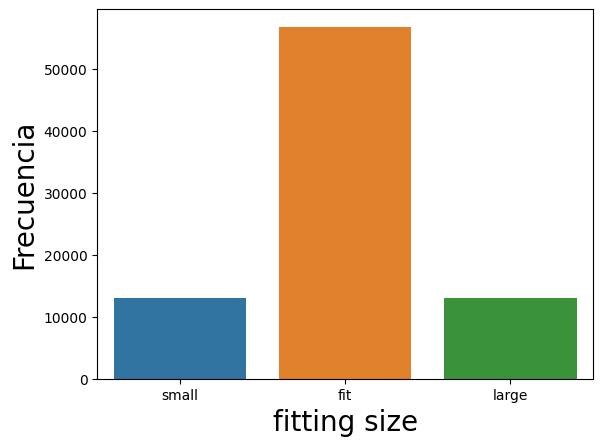

In [ ]:
b=sns.countplot(x = df['fit'])
b.set_xlabel("fitting size",fontsize=20,color='black')
b.set_ylabel("Frecuencia",fontsize=20,color='black')

In [ ]:
print(df.isnull().sum())
print(df.info())

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  obje

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

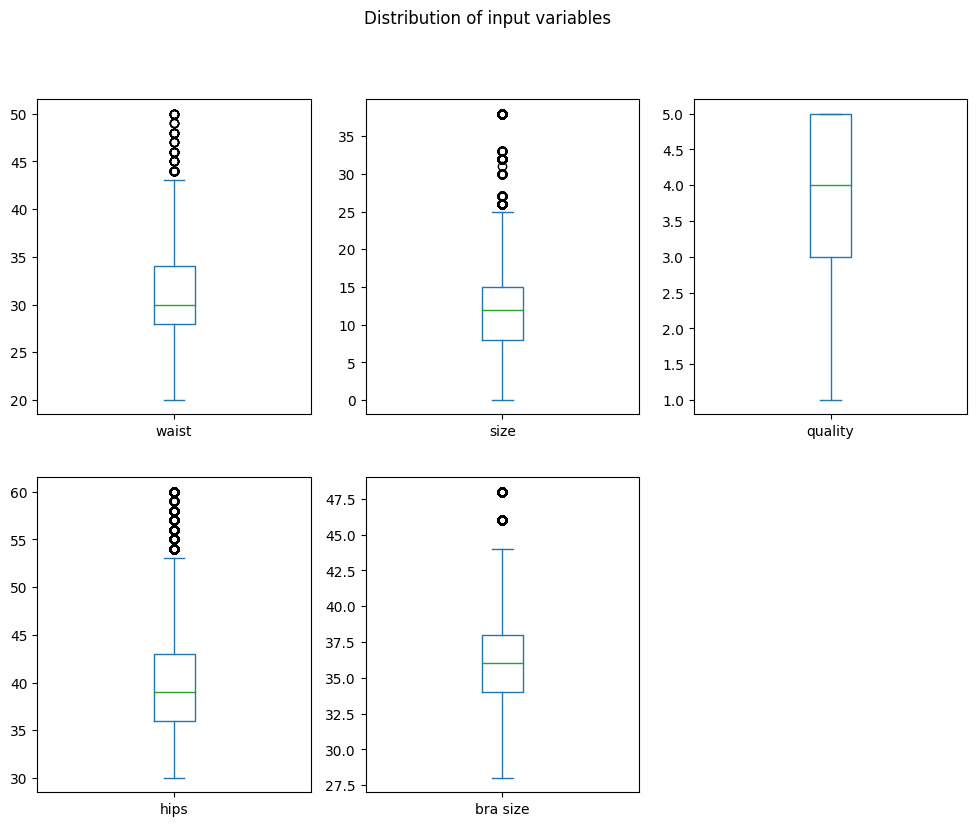

In [ ]:
df.drop(['fit','user_id','shoe size','item_id'], axis=1).plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(12,9), title='Distribution of input variables')
plt.savefig('data_box')
plt

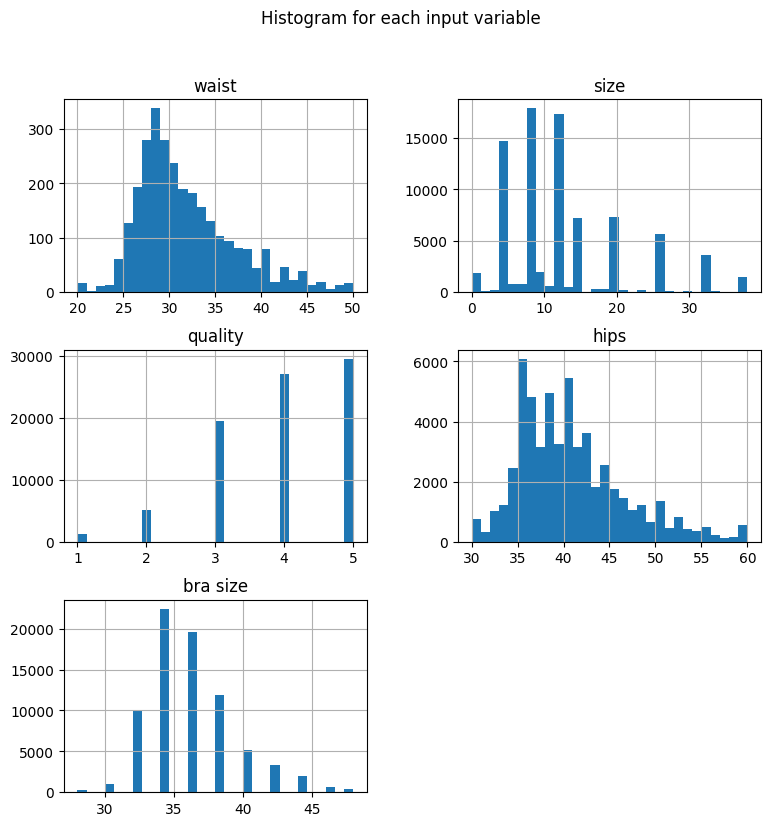

In [ ]:
import pylab as pl
df.drop(['fit','user_id','shoe size','item_id'] ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each input variable")
plt.savefig('data_hist')
plt.show()

TEXT LABELS TO NUMBER FOR THE INPUTS

In [ ]:
#fitting vals to number length (peoples feedback)
from sklearn import preprocessing
lenle = preprocessing.LabelEncoder()
lenle.fit(df['length'])
df['lengthToNumber']=lenle.transform(df['length'])
print(df['length'].unique())
print(df['lengthToNumber'].unique())

['just right' 'slightly long' 'very short' 'slightly short' 'very long'
 nan]
[0 1 4 2 3 5]


In [ ]:
#transform to numbers fit clothing(real size)
le = preprocessing.LabelEncoder()
le.fit(df['fit'])
df['fitToNumber']=le.transform(df['fit'])
print('num vals: ',df['fitToNumber'].unique())
print('original vals: ',df['fit'].unique())

num vals:  [2 0 1]
original vals:  ['small' 'fit' 'large']


In [ ]:
#transform to size shoe width to number
lecl = preprocessing.LabelEncoder()
lecl.fit(df['shoe width'])
df['shoeWidthToNumber']=lecl.transform(df['shoe width'])
print('num vals: ',df['shoeWidthToNumber'].unique())
print('original vals: ',df['shoe width'].unique())

num vals:  [3 2 0 1]
original vals:  [nan 'wide' 'average' 'narrow']


In [ ]:
#transform to size shoe size to number
print('original vals: ',df['shoe size'].unique())
lenle = preprocessing.LabelEncoder()
lenle.fit(df['shoe size'])
df['shoesizeToNumber']=lenle.transform(df['shoe size'])
print(df['shoe size'].unique())
print(df['shoesizeToNumber'].unique())

original vals:  [ nan  9.   8.5 11.   7.   6.   8.   6.5 10.   7.5  5.5  9.5 10.5  5.
 11.5 38. ]
[ nan  9.   8.5 11.   7.   6.   8.   6.5 10.   7.5  5.5  9.5 10.5  5.
 11.5 38. ]
[15  8  7 12  4  2  6  3 10  5  1  9 11  0 13 14]


In [ ]:
#transform cup to number
lecl = preprocessing.LabelEncoder()
lecl.fit(df['height'])
df['heightToNum']=lecl.transform(df['height'])
print('num vals: ',df['heightToNum'].unique())
print('original vals: ',df['height'].unique())

num vals:  [23 19 24 41 21 20 22 16 25 15 26 18 17  7  6 27  4 14 30 28 29  0 12  9
 36  8 33 13 31  1 32 39  5  3 35 38 37 40 34 10  2 11]
original vals:  ['5ft 6in' '5ft 2in' '5ft 7in' nan '5ft 4in' '5ft 3in' '5ft 5in'
 '5ft 10in' '5ft 8in' '5ft' '5ft 9in' '5ft 1in' '5ft 11in' '4ft 11in'
 '4ft 10in' '6ft' '3ft 4in' '4ft 9in' '6ft 3in' '6ft 1in' '6ft 2in' '3ft'
 '4ft 7in' '4ft 4in' '7ft 11in' '4ft 2in' '6ft 6in' '4ft 8in' '6ft 4in'
 '3ft 11in' '6ft 5in' '7ft 6in' '3ft 6in' '3ft 3in' '6ft 8in' '7ft 5in'
 '7ft 3in' '7ft 7in' '6ft 7in' '4ft 5in' '3ft 2in' '4ft 6in']


In [ ]:
#transform cup to number
lecl = preprocessing.LabelEncoder()
lecl.fit(df['cup size'])
df['cupsizeToNum']=lecl.transform(df['cup size'])
print('num vals: ',df['cupsizeToNum'].unique())
print('original vals: ',df['cup size'].unique())

num vals:  [ 4  2  5  3  6  7  9  0 12  8  1 10 11]
original vals:  ['d' 'b' 'dd/e' 'c' 'ddd/f' 'dddd/g' 'i' 'a' nan 'h' 'aa' 'j' 'k']


DROP UNNECESARY COLUMNS OF THE DATASET

In [ ]:
#drop unnecesary values 
df = df.drop(['item_id','quality','category','user_name','review_summary','review_text'
,'user_id'], axis=1)
print(df)

       waist  size cup size  hips  bra size bust   height         length  \
0       29.0     7        d  38.0      34.0   36  5ft 6in     just right   
1       31.0    13        b  30.0      36.0  NaN  5ft 2in     just right   
2       30.0     7        b   NaN      32.0  NaN  5ft 7in  slightly long   
3        NaN    21     dd/e   NaN       NaN  NaN      NaN     just right   
4        NaN    18        b   NaN      36.0  NaN  5ft 2in  slightly long   
...      ...   ...      ...   ...       ...  ...      ...            ...   
82785    NaN     8        b   NaN      36.0  NaN  5ft 8in     just right   
82786    NaN    12    ddd/f   NaN      34.0  NaN  5ft 5in  slightly long   
82787    NaN    12   dddd/g  36.0      32.0  NaN  5ft 4in     just right   
82788    NaN    12      NaN   NaN       NaN  NaN  5ft 3in     just right   
82789    NaN     4        d  39.0      32.0  NaN      6ft     just right   

         fit  shoe size shoe width  lengthToNumber  fitToNumber  \
0      small        

SEPARATE SHOES, WOMEN AND MEN CLOTHES

In [ ]:
#separate shoes from clothes
#clothesDf = df.dropna(subset=['shoe size'])
clothesDf = df
clothesDf = clothesDf.drop(['shoe size','shoe width','shoeWidthToNumber','length','fit','shoesizeToNumber'], axis=1)
womenClothes = clothesDf

#drop nan values for the datset 
womenClothes = womenClothes.dropna(subset=['bra size', 'waist', 'hips','bust','height'])

womenClothes['bust'] = womenClothes['bust'].replace('37-39', np.nan)
womenClothes['bust'] = womenClothes['bust'].astype(float)
# Get the maximum value from 'bust' column
max_value = womenClothes['bust'].max()
# Replace remaining empty values with the maximum value
womenClothes['bust'] = womenClothes['bust'].fillna(max_value)

#get the shoes 
shoesDf = df
shoesDf = shoesDf.drop(['length','fitToNumber','fit','shoe width','shoe size'], axis=1)
shoesDf = shoesDf.dropna(subset=['waist', 'cup size','bra size','hips','bust'])

print('shoes: ',shoesDf.head())
print('--------------------------')
print('clothes: ',womenClothes.head())

shoes:        waist  size cup size  hips  bra size bust    height  lengthToNumber  \
0      29.0     7        d  38.0      34.0   36   5ft 6in               0   
1069   30.0     8        c  40.0      36.0   36   5ft 7in               2   
1748   27.0     4        c  38.0      32.0   34   5ft 4in               0   
1750   27.0     8   dddd/g  34.0      34.0   38  4ft 11in               0   
1751   33.0    12    ddd/f  36.0      38.0   38   5ft 3in               0   

      shoeWidthToNumber  shoesizeToNumber  heightToNum  cupsizeToNum  
0                     3                15           23             4  
1069                  0                 7           24             3  
1748                  3                15           21             3  
1750                  2                 6            7             7  
1751                  2                 5           20             6  
--------------------------
clothes:        waist  size cup size  hips  bra size  bust    height  length

<ipython-input-14-cd86a874a4f7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womenClothes['bust'] = womenClothes['bust'].replace('37-39', np.nan)
<ipython-input-14-cd86a874a4f7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womenClothes['bust'] = womenClothes['bust'].astype(float)
<ipython-input-14-cd86a874a4f7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:


clothesInputs = ['waist', 'size', 'hips', 'bra size', 'bust', 'lengthToNumber', 'cupsizeToNum'
,'heightToNum'
]
X = womenClothes[clothesInputs]
Y = womenClothes['fitToNumber']

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)


rand = RandomForestClassifier().fit(X_train, y_train)
print('Accuracy of Random Forest on training set: {:.2f}'.format(rand.score(X_train, y_train)))
print('Accuracy of Random Forest on test set: {:.2f}'.format(rand.score(X_test, y_test)))

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree on test set: {:.2f}'.format(clf.score(X_test, y_test)))

nb = GaussianNB().fit(X_train, y_train)
print('Accuracy of Naive Bayes on training set: {:.2f}'.format(nb.score(X_train, y_train)))
print('Accuracy of Naive Bayes on test set: {:.2f}'.format(nb.score(X_test, y_test)))


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())
predictions = mlp.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



Accuracy of Random Forest on training set: 0.92
Accuracy of Random Forest on test set: 0.56
Accuracy of Decision Tree on training set: 0.92
Accuracy of Decision Tree on test set: 0.48
Accuracy of Naive Bayes on training set: 0.56
Accuracy of Naive Bayes on test set: 0.52
[[81 18  5]
 [23  6  2]
 [25  8  2]]
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       104
           1       0.19      0.19      0.19        31
           2       0.22      0.06      0.09        35

    accuracy                           0.52       170
   macro avg       0.35      0.34      0.33       170
weighted avg       0.46      0.52      0.48       170



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:


shoeInputs = ['waist', 'size', 'hips', 'bra size', 'lengthToNumber', 'shoeWidthToNumber', 'cupsizeToNum','heightToNum']
X = shoesDf[shoeInputs]
Y = shoesDf['shoesizeToNumber']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X,Y,random_state=0)


rand = RandomForestRegressor().fit(X_train_s, y_train_s)
print('Accuracy of Random Forest on training set: {:.2f}'.format(rand.score(X_train_s, y_train_s)))
print('Accuracy of Random Forest on test set: {:.2f}'.format(rand.score(X_test_s, y_test_s)))

clf = DecisionTreeRegressor().fit(X_train_s, y_train_s)
print('Accuracy of Decision Tree on training set: {:.2f}'.format(clf.score(X_train_s, y_train_s)))
print('Accuracy of Decision Tree on test set: {:.2f}'.format(clf.score(X_test_s, y_test_s)))

nb = GaussianNB().fit(X_train_s, y_train_s)
print('Accuracy of Naive Bayes on training set: {:.2f}'.format(nb.score(X_train_s, y_train_s)))
print('Accuracy of Naive Bayes on test set: {:.2f}'.format(nb.score(X_test_s, y_test_s)))


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_s)

X_train1 = scaler.transform(X_train_s)
X_test1 = scaler.transform(X_test_s)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train1, y_train_s.values.ravel())
predictions = mlp.predict(X_test1)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_s,predictions))
print(classification_report(y_test_s,predictions))



Accuracy of Random Forest on training set: 0.93
Accuracy of Random Forest on test set: 0.60
Accuracy of Decision Tree on training set: 1.00
Accuracy of Decision Tree on test set: 0.30
Accuracy of Naive Bayes on training set: 0.32
Accuracy of Naive Bayes on test set: 0.26
[[ 0  1  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  3  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  7  5  2  1  2  0  0  0  0  0  0  0]
 [ 0  0  0  3  3  4  2  1  1  0  0  0  0  0  2]
 [ 0  0  0  4  3  0 14  4  1  0  0  0  0  0  0]
 [ 0  0  0  2  2  2  6  7  4  0  3  0  0  0  0]
 [ 0  0  0  0  3  2  3  0  6  3  0  0  0  0  1]
 [ 0  0  0  2  1  1  3  0  2  2  0  0  0  0  0]
 [ 0  0  0  1  1  2  1  0  1  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0  0  1  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  2  0  2  0  0  0  0  0  0  4]]
       

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and